/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/github/HU-DAV/.venv/lib/python3.12/site-packages/textblob_nl/_text.py:212: SyntaxWarning: invalid escape sequence '\.'
  RE_ABBR1 = re.compile("^[A-Za-z]\.$")       # single letter, "T. De Smedt"
/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/github/HU-DAV/.venv/lib/python3.12/site-packages/textblob_nl/_text.py:213: SyntaxWarning: invalid escape sequence '\.'
  RE_ABBR2 = re.compile("^([A-Za-z]\.)+$")    # alternating letters, "U.S."
INFO:camera_sentiment:✅ Loaded data: 4565 rows, 11 columns
INFO:camera_sentiment:📸 Found 94 messages containing 'camera'
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_81254/2084352921.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_df_camera["sentiment"] = wa_

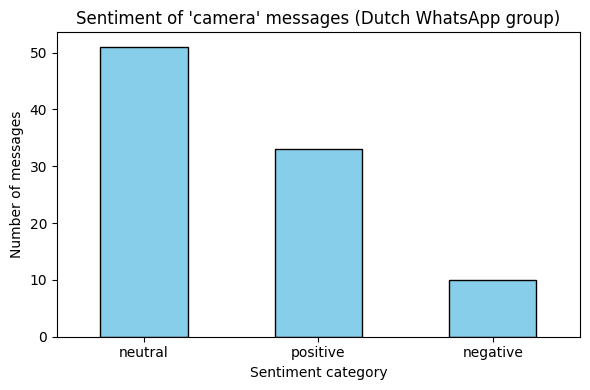

INFO:camera_sentiment:💾 Saved analyzed data to /Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/github/HU-DAV/outputs/camera_sentiment.parquet



Sample analyzed messages:
                timestamp           author                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Analyze WhatsApp apartment group messages about 'camera' using sentiment analysis (Dutch).
"""

import pandas as pd
from pathlib import Path
import tomllib
from textblob import Blobber
from textblob_nl import PatternTagger, PatternAnalyzer
import matplotlib.pyplot as plt
import logging

# ---------------------------------------------------------------------
# Setup logging
# ---------------------------------------------------------------------
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("camera_sentiment")

# ---------------------------------------------------------------------
# Load config and data
# ---------------------------------------------------------------------
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()

if not datafile.exists():
    logger.warning("⚠️ Datafile does not exist. Run src/preprocess.py first.")
    exit(1)

wa_df_all = pd.read_parquet(datafile)
logger.info(f"✅ Loaded data: {wa_df_all.shape[0]} rows, {wa_df_all.shape[1]} columns")

# ---------------------------------------------------------------------
# Filter messages containing the word 'camera'
# ---------------------------------------------------------------------
wa_df_camera = wa_df_all[wa_df_all["message"].str.contains(r"\bcamera\b", case=False, na=False)]
logger.info(f"📸 Found {len(wa_df_camera)} messages containing 'camera'")

if wa_df_camera.empty:
    logger.warning("No messages found containing 'camera'. Exiting.")
    exit(0)

# ---------------------------------------------------------------------
# Sentiment analysis (Dutch)
# ---------------------------------------------------------------------
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(text: str):
    """Return polarity score for a message."""
    try:
        blob = tb(text)
        return blob.sentiment[0]  # polarity score (-1 to 1)
    except Exception as e:
        logger.error(f"Error analyzing sentiment: {e}")
        return None

wa_df_camera["sentiment"] = wa_df_camera["message"].apply(get_sentiment)

# ---------------------------------------------------------------------
# Summary statistics
# ---------------------------------------------------------------------
mean_sent = wa_df_camera["sentiment"].mean()
median_sent = wa_df_camera["sentiment"].median()

logger.info(f"📊 Average sentiment for 'camera' messages: {mean_sent:.3f}")
logger.info(f"📊 Median sentiment: {median_sent:.3f}")

# Count positive / neutral / negative
def classify_sentiment(score):
    if score is None:
        return "unknown"
    elif score > 0.1:
        return "positive"
    elif score < -0.1:
        return "negative"
    else:
        return "neutral"

wa_df_camera["sentiment_category"] = wa_df_camera["sentiment"].apply(classify_sentiment)

sent_counts = wa_df_camera["sentiment_category"].value_counts()
logger.info(f"📈 Sentiment distribution:\n{sent_counts}")

# ---------------------------------------------------------------------
# Visualization
# ---------------------------------------------------------------------
plt.figure(figsize=(6, 4))
sent_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Sentiment of 'camera' messages (Dutch WhatsApp group)")
plt.ylabel("Number of messages")
plt.xlabel("Sentiment category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Save results
# ---------------------------------------------------------------------
output_path = Path("../outputs/camera_sentiment.parquet").resolve()
output_path.parent.mkdir(parents=True, exist_ok=True)
wa_df_camera.to_parquet(output_path, index=False)
logger.info(f"💾 Saved analyzed data to {output_path}")

# Optional: print a few examples
print("\nSample analyzed messages:")
print(wa_df_camera[["timestamp", "author", "message", "sentiment", "sentiment_category"]].head(10).to_string(index=False))


INFO:camera_sentiment:✅ Loaded data: 4565 rows, 11 columns
INFO:camera_sentiment:📸 Found 94 messages containing 'camera'
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_81254/473209199.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_df_camera["sentiment"] = wa_df_camera["message"].apply(get_sentiment)
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_81254/473209199.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_df_camera["sentiment_category"] = wa_df_camera["sentiment"]

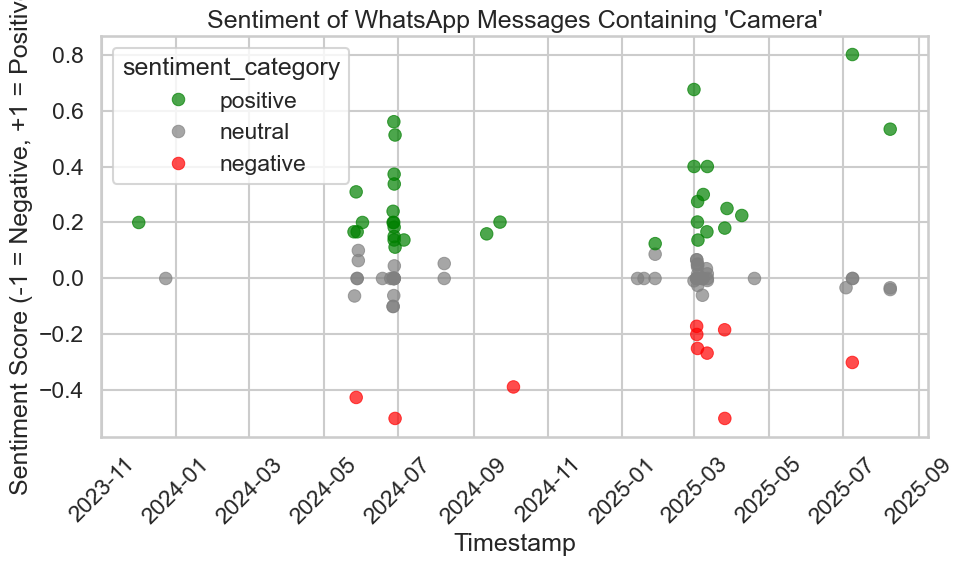

INFO:camera_sentiment:💾 Saved analyzed data to /Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/github/HU-DAV/outputs/camera_sentiment.parquet



Sample analyzed messages:
                timestamp           author                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Analyze WhatsApp apartment group messages about 'camera' using sentiment analysis (Dutch),
and visualize sentiment as a scatter plot using seaborn.
"""

import pandas as pd
from pathlib import Path
import tomllib
from textblob import Blobber
from textblob_nl import PatternTagger, PatternAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# ---------------------------------------------------------------------
# Setup logging
# ---------------------------------------------------------------------
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("camera_sentiment")

# ---------------------------------------------------------------------
# Load config and data
# ---------------------------------------------------------------------
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()

if not datafile.exists():
    logger.warning("⚠️ Datafile does not exist. Run src/preprocess.py first.")
    exit(1)

wa_df_all = pd.read_parquet(datafile)
logger.info(f"✅ Loaded data: {wa_df_all.shape[0]} rows, {wa_df_all.shape[1]} columns")

# ---------------------------------------------------------------------
# Filter messages containing the word 'camera'
# ---------------------------------------------------------------------
wa_df_camera = wa_df_all[wa_df_all["message"].str.contains(r"\bcamera\b", case=False, na=False)]
logger.info(f"📸 Found {len(wa_df_camera)} messages containing 'camera'")

if wa_df_camera.empty:
    logger.warning("No messages found containing 'camera'. Exiting.")
    exit(0)

# ---------------------------------------------------------------------
# Sentiment analysis (Dutch)
# ---------------------------------------------------------------------
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(text: str):
    """Return polarity score for a message."""
    try:
        blob = tb(text)
        return blob.sentiment[0]  # polarity score (-1 to 1)
    except Exception as e:
        logger.error(f"Error analyzing sentiment: {e}")
        return None

wa_df_camera["sentiment"] = wa_df_camera["message"].apply(get_sentiment)

# ---------------------------------------------------------------------
# Categorize sentiment
# ---------------------------------------------------------------------
def classify_sentiment(score):
    if score is None:
        return "unknown"
    elif score > 0.1:
        return "positive"
    elif score < -0.1:
        return "negative"
    else:
        return "neutral"

wa_df_camera["sentiment_category"] = wa_df_camera["sentiment"].apply(classify_sentiment)

# ---------------------------------------------------------------------
# Convert timestamp column to datetime
# ---------------------------------------------------------------------
wa_df_camera["timestamp"] = pd.to_datetime(wa_df_camera["timestamp"], errors="coerce")
wa_df_camera = wa_df_camera.dropna(subset=["timestamp", "sentiment"])

# ---------------------------------------------------------------------
# Scatter Plot (Seaborn)
# ---------------------------------------------------------------------
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=wa_df_camera,
    x="timestamp",
    y="sentiment",
    hue="sentiment_category",
    palette={"positive": "green", "neutral": "gray", "negative": "red"},
    alpha=0.7,
    edgecolor=None
)

plt.title("Sentiment of WhatsApp Messages Containing 'Camera'")
plt.xlabel("Timestamp")
plt.ylabel("Sentiment Score (-1 = Negative, +1 = Positive)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Save results
# ---------------------------------------------------------------------
output_path = Path("../outputs/camera_sentiment.parquet").resolve()
output_path.parent.mkdir(parents=True, exist_ok=True)
wa_df_camera.to_parquet(output_path, index=False)
logger.info(f"💾 Saved analyzed data to {output_path}")

# ---------------------------------------------------------------------
# Print sample
# ---------------------------------------------------------------------
print("\nSample analyzed messages:")
print(wa_df_camera[["timestamp", "author", "message", "sentiment", "sentiment_category"]].head(10).to_string(index=False))


INFO:camera_sentiment:✅ Loaded data: 4565 rows, 11 columns
INFO:camera_sentiment:📸 Found 94 messages containing 'camera'
/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_81254/245098806.py:97: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  wa_df_camera["month"] = wa_df_camera["timestamp"].dt.to_period("M")
INFO:camera_sentiment:📅 Monthly sentiment summary:
INFO:camera_sentiment:       month  mean_sentiment  count
0 2023-12-01        0.100000      2
1 2024-05-01        0.035455      9
2 2024-06-01        0.099565     25
3 2024-07-01        0.137500      1
4 2024-08-01        0.026667      2
INFO:camera_sentiment:📈 Correlation between time and mean sentiment: 0.137 (p = 0.655)
INFO:camera_sentiment:🔍 No statistically significant trend over time (p > 0.05)


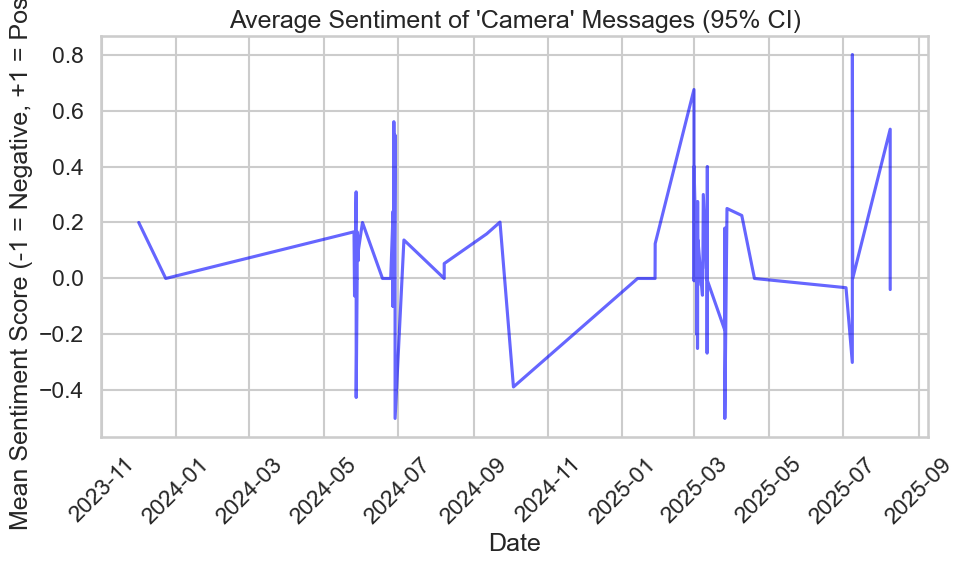

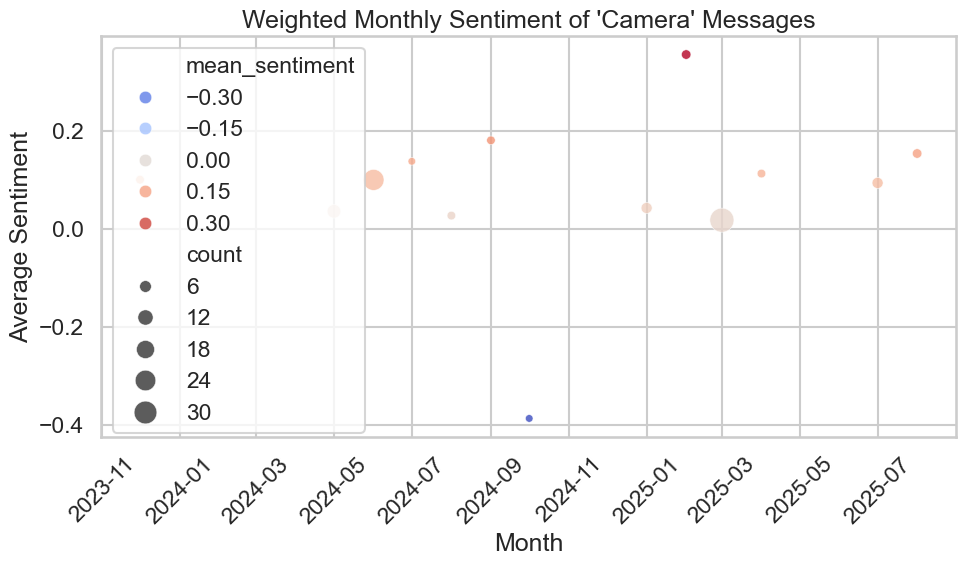

INFO:camera_sentiment:💾 Saved analyzed data to /Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/github/HU-DAV/outputs/camera_sentiment_robust.parquet



Sample analyzed messages:
                timestamp           author                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Robust WhatsApp 'camera' sentiment analysis (Dutch),
minimizing spurious correlations using aggregation and statistical checks.
"""

import pandas as pd
from pathlib import Path
import tomllib
from textblob import Blobber
from textblob_nl import PatternTagger, PatternAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from scipy.stats import pearsonr

# ---------------------------------------------------------------------
# Setup logging
# ---------------------------------------------------------------------
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("camera_sentiment")

# ---------------------------------------------------------------------
# Load config and data
# ---------------------------------------------------------------------
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()

if not datafile.exists():
    logger.warning("⚠️ Datafile does not exist. Run src/preprocess.py first.")
    exit(1)

wa_df_all = pd.read_parquet(datafile)
logger.info(f"✅ Loaded data: {wa_df_all.shape[0]} rows, {wa_df_all.shape[1]} columns")

# ---------------------------------------------------------------------
# Filter messages containing the word 'camera'
# ---------------------------------------------------------------------
wa_df_camera = wa_df_all[wa_df_all["message"].str.contains(r"\bcamera\b", case=False, na=False)]
logger.info(f"📸 Found {len(wa_df_camera)} messages containing 'camera'")

if wa_df_camera.empty:
    logger.warning("No messages found containing 'camera'. Exiting.")
    exit(0)

# ---------------------------------------------------------------------
# Clean and filter low-quality messages
# ---------------------------------------------------------------------
# Remove very short or meaningless messages (e.g. single emojis or links)
wa_df_camera = wa_df_camera[wa_df_camera["message_length"] > 5]

# ---------------------------------------------------------------------
# Sentiment analysis (Dutch)
# ---------------------------------------------------------------------
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(text: str):
    """Return polarity score for a message."""
    try:
        blob = tb(text)
        return blob.sentiment[0]  # polarity score (-1 to 1)
    except Exception as e:
        logger.error(f"Error analyzing sentiment: {e}")
        return None

wa_df_camera["sentiment"] = wa_df_camera["message"].apply(get_sentiment)

# ---------------------------------------------------------------------
# Categorize sentiment
# ---------------------------------------------------------------------
def classify_sentiment(score):
    if score is None:
        return "unknown"
    elif score > 0.1:
        return "positive"
    elif score < -0.1:
        return "negative"
    else:
        return "neutral"

wa_df_camera["sentiment_category"] = wa_df_camera["sentiment"].apply(classify_sentiment)

# ---------------------------------------------------------------------
# Convert timestamp column to datetime
# ---------------------------------------------------------------------
wa_df_camera["timestamp"] = pd.to_datetime(wa_df_camera["timestamp"], errors="coerce")
wa_df_camera = wa_df_camera.dropna(subset=["timestamp", "sentiment"])

# ---------------------------------------------------------------------
# Aggregate by month to reduce noise
# ---------------------------------------------------------------------
wa_df_camera["month"] = wa_df_camera["timestamp"].dt.to_period("M")
monthly_stats = (
    wa_df_camera.groupby("month")
    .agg(mean_sentiment=("sentiment", "mean"), count=("sentiment", "count"))
    .reset_index()
)
monthly_stats["month"] = monthly_stats["month"].dt.to_timestamp()

logger.info("📅 Monthly sentiment summary:")
logger.info(monthly_stats.head())

# ---------------------------------------------------------------------
# Correlation check (time vs sentiment)
# ---------------------------------------------------------------------
monthly_stats["t_ordinal"] = monthly_stats["month"].map(pd.Timestamp.toordinal)
corr, pval = pearsonr(monthly_stats["t_ordinal"], monthly_stats["mean_sentiment"])
logger.info(f"📈 Correlation between time and mean sentiment: {corr:.3f} (p = {pval:.3f})")

if pval > 0.05:
    logger.info("🔍 No statistically significant trend over time (p > 0.05)")
else:
    logger.info("✅ Significant trend detected (p < 0.05)")

# ---------------------------------------------------------------------
# Visualization 1: Monthly average sentiment with CI
# ---------------------------------------------------------------------
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=wa_df_camera,
    x="timestamp",
    y="sentiment",
    estimator="mean",
    errorbar=("ci", 95),
    color="blue",
    alpha=0.6,
)
plt.title("Average Sentiment of 'Camera' Messages (95% CI)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score (-1 = Negative, +1 = Positive)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Visualization 2: Weighted monthly scatter (bubble size = # messages)
# ---------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_stats,
    x="month",
    y="mean_sentiment",
    size="count",
    sizes=(30, 300),
    hue="mean_sentiment",
    palette="coolwarm",
    legend="brief",
    alpha=0.8,
)
plt.title("Weighted Monthly Sentiment of 'Camera' Messages")
plt.xlabel("Month")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Save results
# ---------------------------------------------------------------------
output_path = Path("../outputs/camera_sentiment_robust.parquet").resolve()
output_path.parent.mkdir(parents=True, exist_ok=True)
wa_df_camera.to_parquet(output_path, index=False)
logger.info(f"💾 Saved analyzed data to {output_path}")

# ---------------------------------------------------------------------
# Print sample
# ---------------------------------------------------------------------
print("\nSample analyzed messages:")
print(
    wa_df_camera[
        ["timestamp", "author", "message", "sentiment", "sentiment_category"]
    ].head(10).to_string(index=False)
)


💡 Interpreting the Plot

PC1 high: authors who write more / longer / with emojis on weekends

PC1 low: authors who are more active during weekdays

PC2: other behavioral contrasts (like emoji vs link use)

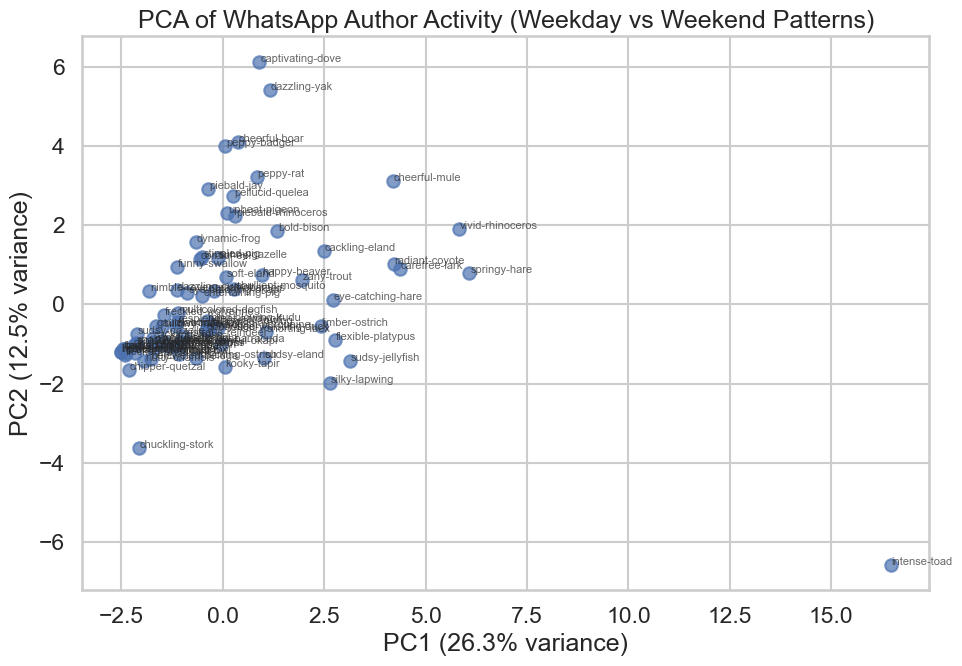


Top loadings for PC1 (weekend vs weekday pattern):
                       PC1       PC2
n_messages_1      0.349718 -0.127504
n_messages_2      0.344864 -0.138895
n_messages_4      0.344277 -0.128856
n_messages_0      0.340717 -0.099338
n_messages_3      0.340400 -0.152532
n_messages_5      0.335131 -0.142522
n_messages_6      0.334027 -0.134686
avg_msg_length_2  0.157675  0.066246
avg_msg_length_3  0.147926  0.066468
has_emoji_rate_3  0.143034  0.368014

Bottom loadings for PC1:
                       PC1       PC2
has_emoji_rate_1  0.069257  0.354542
avg_msg_length_5  0.040699 -0.034677
avg_msg_length_6  0.023991 -0.087529
has_link_rate_6   0.022187  0.033034
has_link_rate_1   0.009052 -0.051205
has_link_rate_2   0.003808 -0.029355
has_link_rate_0   0.002779  0.037692
has_link_rate_3  -0.003162 -0.111623
has_link_rate_4  -0.026931 -0.097207
has_link_rate_5  -0.027540 -0.124943


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --------------------------------------------------
# 1️⃣ Load dataset
# --------------------------------------------------
from pathlib import Path
import tomllib
import logging

logger = logging.getLogger(__name__)

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. Run src/preprocess.py first!")
    
wa_df_all = pd.read_parquet(datafile)

# --------------------------------------------------
# 2️⃣ Feature Engineering: author × temporal activity
# --------------------------------------------------

# Focus only on messages that have authors
wa_df = wa_df_all.dropna(subset=["author"])

# Extract weekday/weekend flag
wa_df["is_weekend"] = wa_df["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

# Aggregate by author × day_of_week
# We compute average message length, emoji usage, etc.
agg = (
    wa_df.groupby(["author", "day_of_week"])
    .agg(
        avg_msg_length=("message_length", "mean"),
        n_messages=("message", "count"),
        has_emoji_rate=("has_emoji", "mean"),
        has_link_rate=("has_link", "mean"),
    )
    .reset_index()
)

# Pivot so that each author has columns for each day of week (e.g., Mon_avg_msg_length)
features = []
for col in ["avg_msg_length", "n_messages", "has_emoji_rate", "has_link_rate"]:
    pivot = agg.pivot(index="author", columns="day_of_week", values=col)
    pivot.columns = [f"{col}_{d}" for d in pivot.columns]
    features.append(pivot)

df_features = pd.concat(features, axis=1).fillna(0)

# --------------------------------------------------
# 3️⃣ Scale and apply PCA
# --------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)

# --------------------------------------------------
# 4️⃣ Plot the results
# --------------------------------------------------

plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
for i, author in enumerate(pca_df.index):
    plt.text(pca_df.iloc[i, 0] + 0.02, pca_df.iloc[i, 1], author, fontsize=8, alpha=0.7)

plt.title("PCA of WhatsApp Author Activity (Weekday vs Weekend Patterns)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 5️⃣ Inspect PCA loadings (optional but important)
# --------------------------------------------------

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df_features.columns,
).sort_values("PC1", ascending=False)

print("\nTop loadings for PC1 (weekend vs weekday pattern):")
print(loadings.head(10))
print("\nBottom loadings for PC1:")
print(loadings.tail(10))


💡 Interpreting the Plot

PC1 high: authors who write more / longer / with emojis on weekends

PC1 low: authors who are more active during weekdays

PC2: other behavioral contrasts (like emoji vs link use)

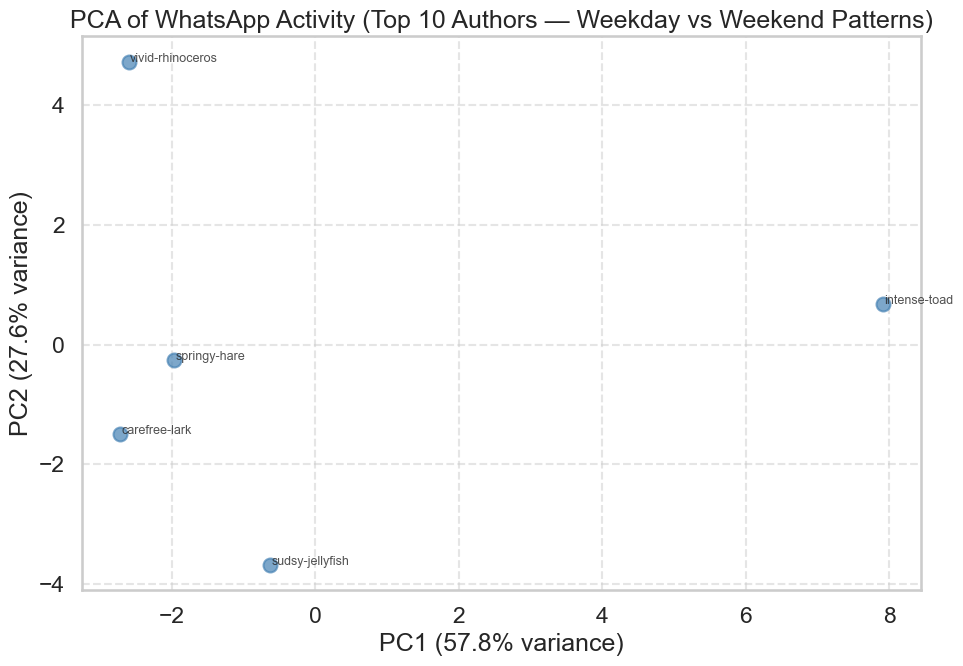


Top loadings for PC1 (possible weekend vs weekday signal):
                       PC1       PC2
n_messages_1      0.245562  0.055557
n_messages_5      0.244783  0.055044
has_link_rate_2   0.244353  0.044390
has_link_rate_5   0.244353  0.044390
n_messages_2      0.238354  0.032624
n_messages_3      0.237313  0.069102
n_messages_0      0.235598  0.002685
avg_msg_length_0  0.230610 -0.130677
n_messages_4      0.229452  0.130843
avg_msg_length_3  0.226141  0.110788

Bottom loadings for PC1:
                       PC1       PC2
avg_msg_length_4 -0.024174  0.314416
has_link_rate_4  -0.032998  0.324459
has_link_rate_6  -0.080276  0.305845
has_emoji_rate_6 -0.114774  0.195570
has_emoji_rate_0 -0.139875  0.294005
has_emoji_rate_1 -0.183370  0.151275
has_emoji_rate_5 -0.183380  0.138817
has_emoji_rate_3 -0.189656  0.220562
has_emoji_rate_4 -0.205832  0.127600
has_emoji_rate_2 -0.223920  0.143987


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import tomllib
import logging

logger = logging.getLogger(__name__)

# --------------------------------------------------
# 1️⃣ Load dataset
# --------------------------------------------------

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. Run src/preprocess.py first!")

wa_df_all = pd.read_parquet(datafile)

# --------------------------------------------------
# 2️⃣ Preprocess & Select Top 10 Authors
# --------------------------------------------------

wa_df = wa_df_all.dropna(subset=["author"])

# Count messages per author and select top 10
top10_authors = (
    wa_df["author"].value_counts()
    .head(5)
    .index
)

wa_df = wa_df[wa_df["author"].isin(top10_authors)]

# Add weekend flag
wa_df["is_weekend"] = wa_df["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

# --------------------------------------------------
# 3️⃣ Aggregate features by author × day_of_week
# --------------------------------------------------

agg = (
    wa_df.groupby(["author", "day_of_week"])
    .agg(
        avg_msg_length=("message_length", "mean"),
        n_messages=("message", "count"),
        has_emoji_rate=("has_emoji", "mean"),
        has_link_rate=("has_link", "mean"),
    )
    .reset_index()
)

# Pivot: each author → 7 columns per feature (Mon, Tue, ..., Sun)
features = []
for col in ["avg_msg_length", "n_messages", "has_emoji_rate", "has_link_rate"]:
    pivot = agg.pivot(index="author", columns="day_of_week", values=col)
    pivot.columns = [f"{col}_{d}" for d in pivot.columns]
    features.append(pivot)

df_features = pd.concat(features, axis=1).fillna(0)

# --------------------------------------------------
# 4️⃣ PCA
# --------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)

# --------------------------------------------------
# 5️⃣ Plot
# --------------------------------------------------

plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=100, alpha=0.7, color="steelblue")

# Add author labels
for i, author in enumerate(pca_df.index):
    plt.text(
        pca_df.iloc[i, 0] + 0.02,
        pca_df.iloc[i, 1],
        author,
        fontsize=9,
        alpha=0.8,
    )

plt.title("PCA of WhatsApp Activity (Top 10 Authors — Weekday vs Weekend Patterns)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6️⃣ Inspect PCA Loadings
# --------------------------------------------------

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df_features.columns,
).sort_values("PC1", ascending=False)

print("\nTop loadings for PC1 (possible weekend vs weekday signal):")
print(loadings.head(10))
print("\nBottom loadings for PC1:")
print(loadings.tail(10))


🧭 How This Works

Features per author:

avg_msg_length → longer messages indicate informational.

emoji_ratio → emoji-heavy messages indicate social/casual.

link_ratio → messages with links → informational.

Scaling ensures all features are comparable.

PCA identifies axes:

PC1 likely separates “social” ↔ “informational”.

PC2 may capture secondary behavior (e.g., short but link-heavy).

Plot shows authors in the 2D space.

Left → emoji/social-heavy

Right → long/link-heavy informational

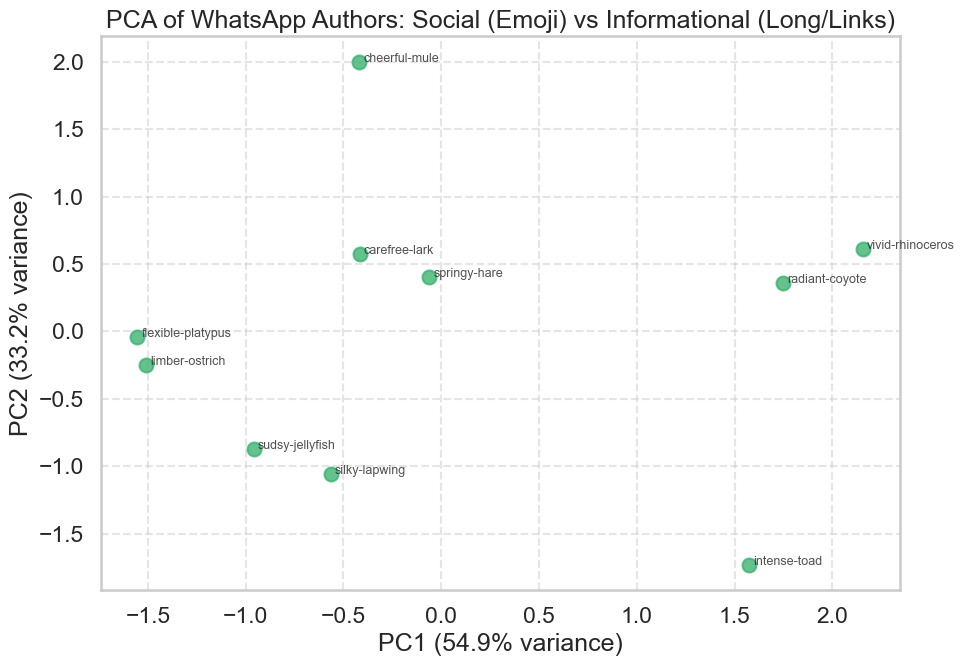


PCA loadings for social vs informational pattern:
                     PC1       PC2
link_ratio      0.705643 -0.010518
avg_msg_length  0.668678 -0.320867
emoji_ratio     0.234386  0.947066


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import tomllib
import logging

logger = logging.getLogger(__name__)

# --------------------------------------------------
# 1️⃣ Load dataset
# --------------------------------------------------

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. Run src/preprocess.py first!")

wa_df_all = pd.read_parquet(datafile)

# --------------------------------------------------
# 2️⃣ Focus on top authors (optional)
# --------------------------------------------------

wa_df = wa_df_all.dropna(subset=["author"])
top_authors = wa_df["author"].value_counts().head(10).index
wa_df = wa_df[wa_df["author"].isin(top_authors)]

# --------------------------------------------------
# 3️⃣ Feature Engineering: social vs informational
# --------------------------------------------------

# Aggregate per author
agg = (
    wa_df.groupby("author")
    .agg(
        avg_msg_length=("message_length", "mean"),   # longer → informational
        n_messages=("message", "count"),             # activity
        has_emoji_rate=("has_emoji", "mean"),       # social/casual
        has_link_rate=("has_link", "mean"),         # informational
    )
    .reset_index()
)

df_features = agg.set_index("author")

# Optional: Add ratios to make features comparable
# e.g., emoji messages / total messages, link messages / total messages
df_features["emoji_ratio"] = df_features["has_emoji_rate"]
df_features["link_ratio"] = df_features["has_link_rate"]

features = ["avg_msg_length", "emoji_ratio", "link_ratio"]

# --------------------------------------------------
# 4️⃣ Scale and PCA
# --------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)

# --------------------------------------------------
# 5️⃣ Plot PCA results
# --------------------------------------------------

plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=100, alpha=0.8, color="mediumseagreen")

# Add author labels
for i, author in enumerate(pca_df.index):
    plt.text(
        pca_df.iloc[i, 0] + 0.02,
        pca_df.iloc[i, 1],
        author,
        fontsize=9,
        alpha=0.8
    )

plt.title("PCA of WhatsApp Authors: Social (Emoji) vs Informational (Long/Links)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6️⃣ Inspect PCA loadings
# --------------------------------------------------

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
).sort_values("PC1", ascending=False)

print("\nPCA loadings for social vs informational pattern:")
print(loadings)


🧭 How It Works

Features per author:

avg_msg_length → captures long messages.

link_rate → captures informational links.

few_emoji_rate = 1 - emoji_rate → aligns “fewer emojis” with informational behavior.

PCA finds axes:

PC1 usually separates “informational-heavy” (long messages, links, few emojis) from other styles.

PC2 captures secondary variance (maybe overall activity).

Plot shows authors in a 2D space.

High PC1 → authors with long, link-heavy, emoji-light messages.

Low PC1 → social/casual authors.

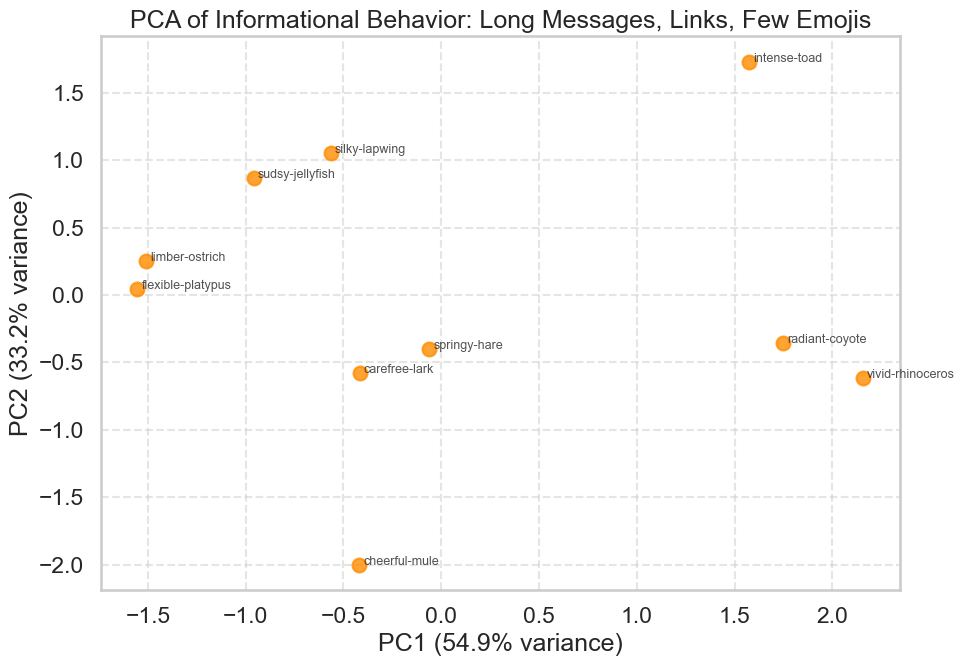


PCA loadings for informational pattern (high msg length, links, few emojis):
                     PC1       PC2
link_rate       0.705643  0.010518
avg_msg_length  0.668678  0.320867
few_emoji_rate -0.234386  0.947066


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import tomllib
import logging

logger = logging.getLogger(__name__)

# --------------------------------------------------
# 1️⃣ Load dataset
# --------------------------------------------------

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. Run src/preprocess.py first!")

wa_df_all = pd.read_parquet(datafile)

# --------------------------------------------------
# 2️⃣ Focus on top authors (optional)
# --------------------------------------------------

wa_df = wa_df_all.dropna(subset=["author"])
top_authors = wa_df["author"].value_counts().head(10).index
wa_df = wa_df[wa_df["author"].isin(top_authors)]

# --------------------------------------------------
# 3️⃣ Feature Engineering: informational pattern
# --------------------------------------------------

# Aggregate per author
agg = (
    wa_df.groupby("author")
    .agg(
        avg_msg_length=("message_length", "mean"),   # long messages
        n_messages=("message", "count"),             # total activity
        link_rate=("has_link", "mean"),             # high link usage
        emoji_rate=("has_emoji", "mean"),           # invert for "few emojis"
    )
    .reset_index()
)

df_features = agg.set_index("author")

# Create "few_emoji_rate" to align direction with informational
df_features["few_emoji_rate"] = 1 - df_features["emoji_rate"]

# Features to include in PCA
features = ["avg_msg_length", "link_rate", "few_emoji_rate"]

# --------------------------------------------------
# 4️⃣ Scale and apply PCA
# --------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)

# --------------------------------------------------
# 5️⃣ Plot PCA results
# --------------------------------------------------

plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=100, alpha=0.8, color="darkorange")

# Add author labels
for i, author in enumerate(pca_df.index):
    plt.text(
        pca_df.iloc[i, 0] + 0.02,
        pca_df.iloc[i, 1],
        author,
        fontsize=9,
        alpha=0.8
    )

plt.title("PCA of Informational Behavior: Long Messages, Links, Few Emojis")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6️⃣ Inspect PCA loadings
# --------------------------------------------------

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
).sort_values("PC1", ascending=False)

print("\nPCA loadings for informational pattern (high msg length, links, few emojis):")
print(loadings)


🧭 How It Works

Binning hours:

Late Night: 0–6

Morning: 6–12

Afternoon: 12–18

Evening: 18–24

Aggregate per author → gives fraction of messages sent at each time.

PCA identifies main axes of temporal variation:

PC1 likely separates night owls (high Late Night fraction) from daytime communicators (high Morning/Afternoon fraction).

PC2 may capture Evening vs Morning preference.

Plot shows authors in 2D space.

High PC1 → night owls

Low PC1 → daytime communicators

/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_81254/2914227633.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wa_df.groupby(["author", "hour_bin"])


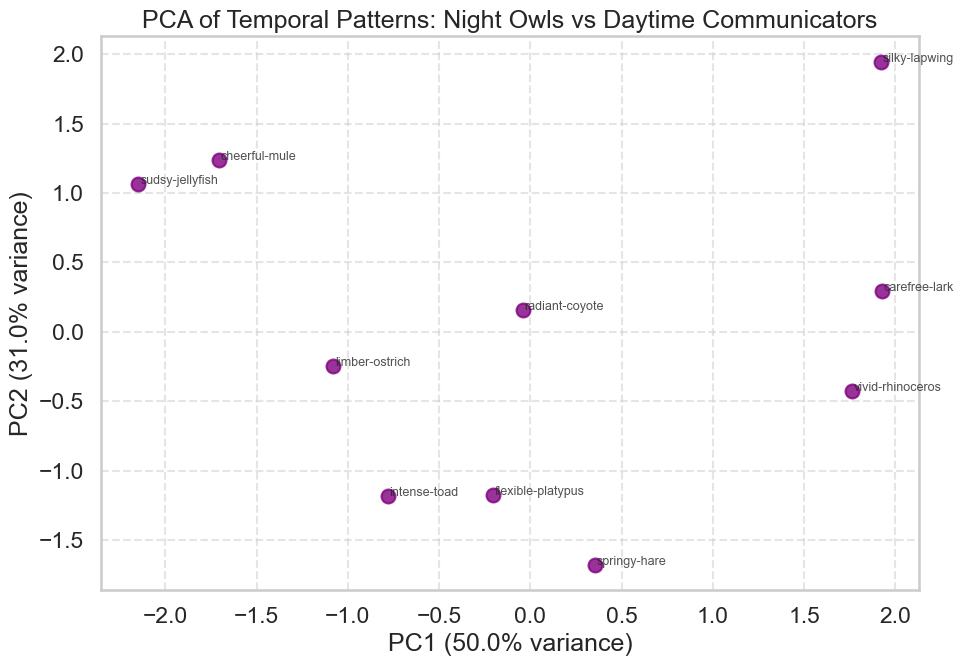


PCA loadings for temporal pattern (night vs day activity):
                 PC1       PC2
hour_bin                      
Evening     0.699916 -0.103241
Late Night  0.133398  0.678574
Afternoon  -0.426344 -0.561409
Morning    -0.557273  0.462276


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import tomllib
import logging

logger = logging.getLogger(__name__)

# --------------------------------------------------
# 1️⃣ Load dataset
# --------------------------------------------------

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)

datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. Run src/preprocess.py first!")

wa_df_all = pd.read_parquet(datafile)

# --------------------------------------------------
# 2️⃣ Focus on top authors
# --------------------------------------------------

wa_df = wa_df_all.dropna(subset=["author"])
top_authors = wa_df["author"].value_counts().head(10).index
wa_df = wa_df[wa_df["author"].isin(top_authors)]

# --------------------------------------------------
# 3️⃣ Feature Engineering: hourly activity
# --------------------------------------------------

# Ensure timestamp is datetime
wa_df["timestamp"] = pd.to_datetime(wa_df["timestamp"])

# Extract hour as integer 0-23
wa_df["hour_numeric"] = wa_df["timestamp"].dt.hour

# Bin hours into 4 time-of-day bins
wa_df["hour_bin"] = pd.cut(
    wa_df["hour_numeric"],
    bins=[0, 6, 12, 18, 24],
    labels=["Late Night", "Morning", "Afternoon", "Evening"],
    right=False
)

# Aggregate per author × hour_bin
agg = (
    wa_df.groupby(["author", "hour_bin"])
    .agg(n_messages=("message", "count"))
    .reset_index()
)

# Pivot so each author has one column per hour_bin
df_features = agg.pivot(index="author", columns="hour_bin", values="n_messages").fillna(0)

# Normalize per author (fraction of messages in each time bin)
df_features = df_features.div(df_features.sum(axis=1), axis=0)

# --------------------------------------------------
# 4️⃣ Scale and PCA
# --------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)

# --------------------------------------------------
# 5️⃣ Plot PCA results
# --------------------------------------------------

plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=100, alpha=0.8, color="purple")

# Add author labels
for i, author in enumerate(pca_df.index):
    plt.text(
        pca_df.iloc[i, 0] + 0.01,
        pca_df.iloc[i, 1],
        author,
        fontsize=9,
        alpha=0.8
    )

plt.title("PCA of Temporal Patterns: Night Owls vs Daytime Communicators")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6️⃣ Inspect PCA loadings
# --------------------------------------------------

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df_features.columns
).sort_values("PC1", ascending=False)

print("\nPCA loadings for temporal pattern (night vs day activity):")
print(loadings)
